In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
acc = pd.read_csv('original_files/accounts.csv')
dd = pd.read_csv('original_files/data_dictionary.csv')
prod = pd.read_csv('original_files/products.csv')
sp = pd.read_csv('original_files/sales_pipeline.csv')
st = pd.read_csv('original_files/sales_teams.csv')

In [3]:
print("Accounts Dataset:")
print(acc.info())
print(acc.head())

print("\nData Dictionary Dataset:")
print(dd.info())
print(dd.head())

print("\nProducts Dataset:")
print(prod.info())
print(prod.head())

print("\nSales Pipeline Dataset:")
print(sp.info())
print(sp.head())

print("\nSales Teams Dataset:")
print(st.info())
print(st.head())

Accounts Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical

In [4]:
acc['subsidiary_of'] = acc['subsidiary_of'].fillna('Unknown')

sp['account'] = sp['account'].fillna('Unknown')
sp['engage_date'] = sp['engage_date'].fillna('Unknown')
sp['close_date'] = sp['close_date'].fillna('Unknown')
sp['close_value'] = sp['close_value'].fillna(0)

acc_null_sum = acc.isnull().sum()
sp_null_sum = sp.isnull().sum()

# Print null sums
print("Null Sums for Accounts Dataset:")
print(acc_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(sp_null_sum)

Null Sums for Accounts Dataset:
account             0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
subsidiary_of       0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64


In [5]:
acc = acc.drop_duplicates()
dd = dd.drop_duplicates()
prod = prod.drop_duplicates()
sp = sp.drop_duplicates()
st = st.drop_duplicates()

In [6]:
lowest_revenue = acc['revenue'].min()
highest_revenue = acc['revenue'].max()

print(f"Lowest revenue value: {lowest_revenue}, Highest revenue value: {highest_revenue}")

Lowest revenue value: 4.54, Highest revenue value: 11698.03


In [7]:
print(acc.head())

            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States       Unknown  
1   United States       Unknown  
2           Kenya       Unknown  
3      Philipines       Unknown  
4   United States       Unknown  


In [8]:
lost_deals = sp[sp['deal_stage'].str.lower() == 'lost']

print(lost_deals.head())

   opportunity_id       sales_agent       product  \
11       KWVA7VR1  Gladys Colclough        GTXPro   
15       3F5MZNEH   Rosalina Dieter    MG Special   
18       902REDPA   Daniell Hammack        GTXPro   
20       JJXRR8R6    James Ascencio  GTX Plus Pro   
27       AO9Z2D17  Violet Mclelland  GTX Plus Pro   

                         account deal_stage engage_date  close_date  \
11  Genco Pura Olive Oil Company       Lost  2016-11-04  2017-03-18   
15                        Sonron       Lost  2016-11-05  2017-03-03   
18                      Xx-zobam       Lost  2016-11-07  2017-03-09   
20                    Fasehatice       Lost  2016-11-07  2017-03-17   
27                      Xx-zobam       Lost  2016-11-10  2017-03-11   

    close_value  
11          0.0  
15          0.0  
18          0.0  
20          0.0  
27          0.0  


In [9]:
validation_map = {
    'product': {'ref_df': prod, 'ref_col': 'product'}, # Adjust 'product' if the ID column has a different name
    'account': {'ref_df': acc, 'ref_col': 'account'}, 
    'sales_agent': {'ref_df': st, 'ref_col': 'sales_agent'}
}

for sp_col, info in validation_map.items():
    print(f"\n--- Checking Pipeline Column: {sp_col} ---")

    pipeline_values = set(sp[sp_col].unique())
    reference_values = set(info['ref_df'][info['ref_col']].unique())
    missing_in_ref = pipeline_values - reference_values
    unused_in_sp = reference_values - pipeline_values

    if not missing_in_ref:
        print(f"✅ Success: All '{sp_col}' values exist in the reference file.")
    else:
        print(f"❌ Missing in Reference: {missing_in_ref}")

    if unused_in_sp:
        print(f"⚠️  Note: These reference keys are not present in the pipeline: {unused_in_sp}")


--- Checking Pipeline Column: product ---
❌ Missing in Reference: {'GTXPro'}
⚠️  Note: These reference keys are not present in the pipeline: {'GTX Pro'}

--- Checking Pipeline Column: account ---
❌ Missing in Reference: {'Unknown'}

--- Checking Pipeline Column: sales_agent ---
✅ Success: All 'sales_agent' values exist in the reference file.
⚠️  Note: These reference keys are not present in the pipeline: {'Mei-Mei Johns', 'Natalya Ivanova', 'Carl Lin', 'Elizabeth Anderson', 'Carol Thompson'}


In [10]:
products_dict = dict(zip(prod['product'], prod['series'])) 
if 'GTX Pro' in products_dict:
    products_dict['GTXPro'] = products_dict['GTX Pro']
    del products_dict['GTX Pro']
    print("Successfully renamed 'GTX Pro' to 'GTXPro'")

Successfully renamed 'GTX Pro' to 'GTXPro'


In [11]:
sp
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         8800 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8800 non-null   object 
 6   close_date      8800 non-null   object 
 7   close_value     8800 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


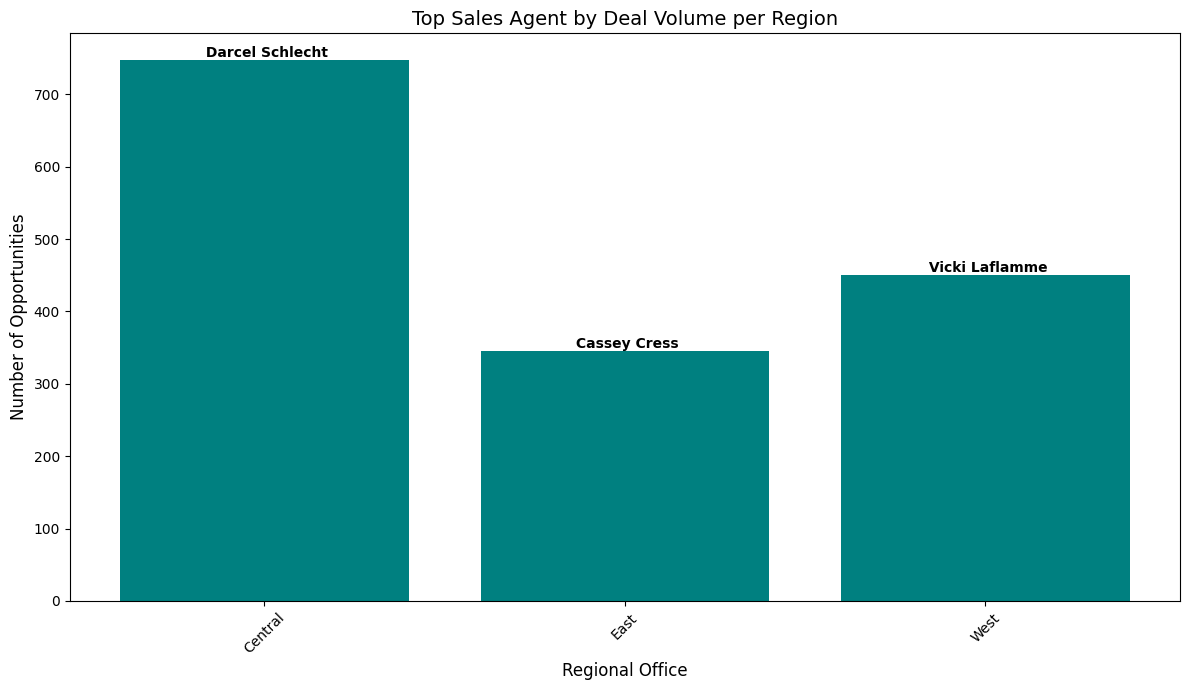

In [12]:
st.rename(columns={"regiinal_office": "regional_office"}, inplace=True)
df_merged = sp.merge(st, on='sales_agent', how='left')
grouped = df_merged.groupby(['regional_office', 'sales_agent']).size().reset_index(name='count')
top_agents = grouped.loc[grouped.groupby('regional_office')['count'].idxmax()]

plt.figure(figsize=(12, 7))
bars = plt.bar(top_agents['regional_office'], top_agents['count'], color='teal')
plt.title('Top Sales Agent by Deal Volume per Region', fontsize=14)
plt.xlabel('Regional Office', fontsize=12)
plt.ylabel('Number of Opportunities', fontsize=12)
plt.xticks(rotation=45)
for bar, agent in zip(bars, top_agents['sales_agent']):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f' {agent}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

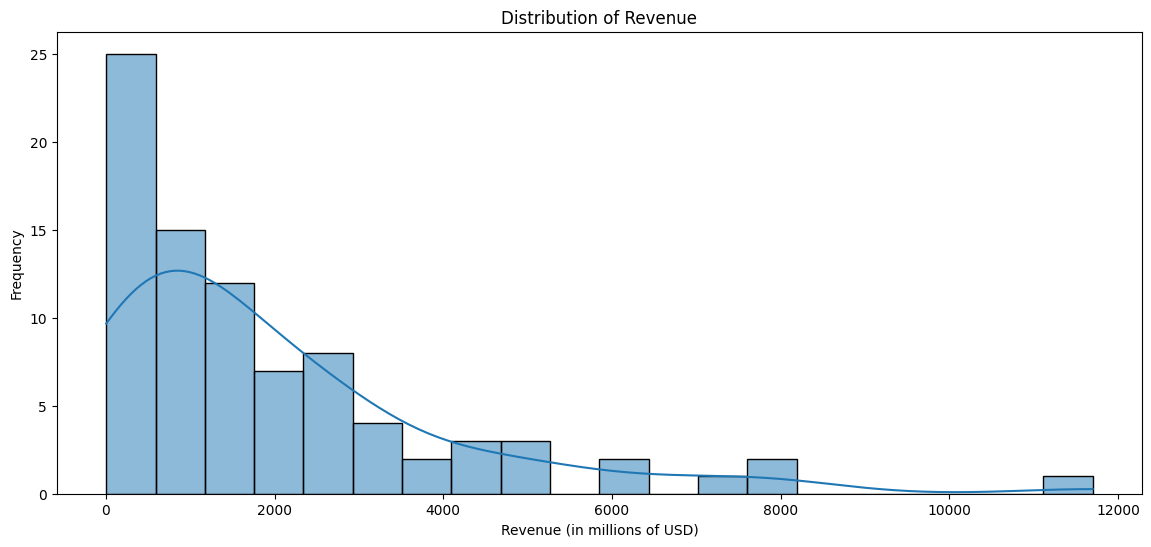

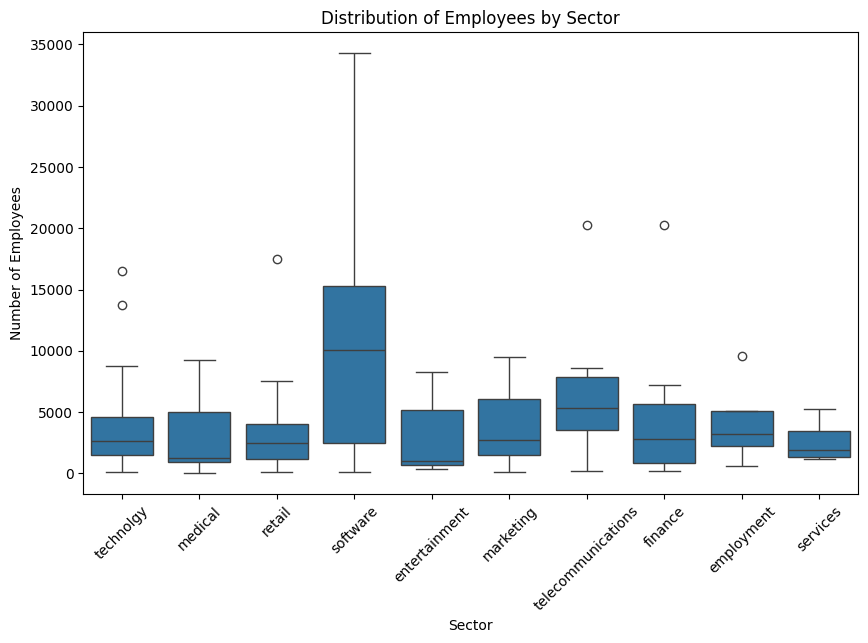

In [13]:
plt.figure(figsize=(14, 6))
sns.histplot(acc['revenue'], bins=20, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in millions of USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sector', y='employees', data=acc)
plt.title('Distribution of Employees by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

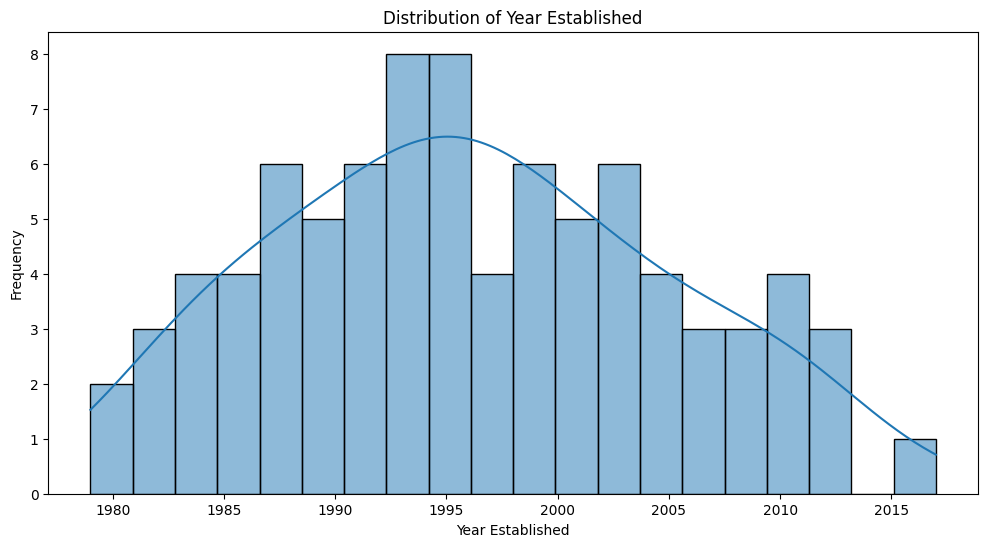

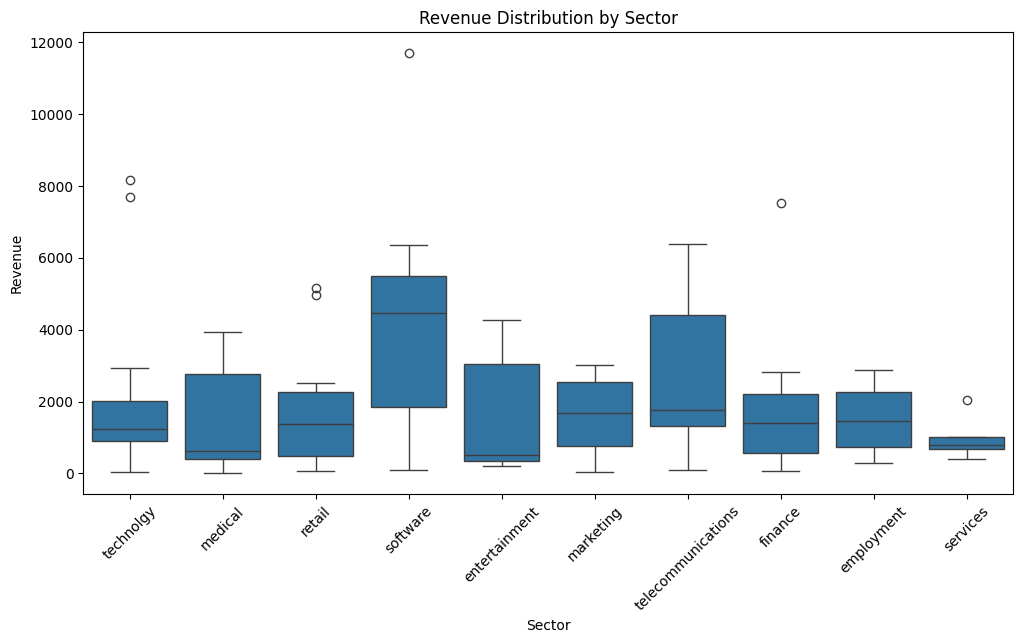

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(x='year_established', data=acc, bins=20, kde=True)
plt.title('Distribution of Year Established')
plt.xlabel('Year Established')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='revenue', data=acc)
plt.title('Revenue Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

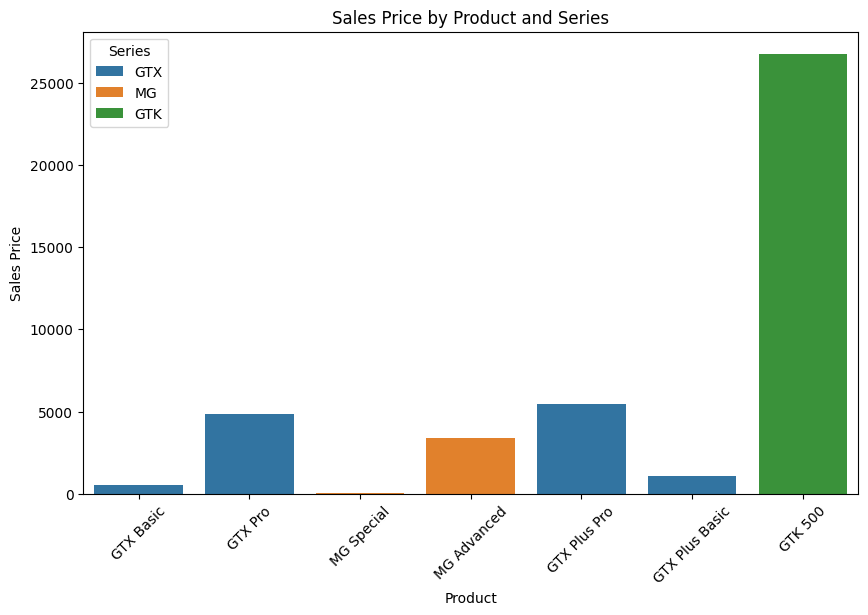

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product', y='sales_price', hue='series', data=prod)
plt.title('Sales Price by Product and Series')
plt.xlabel('Product')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.legend(title='Series')
plt.show()

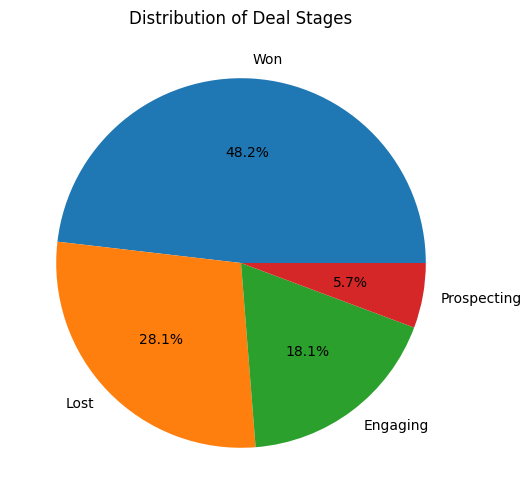

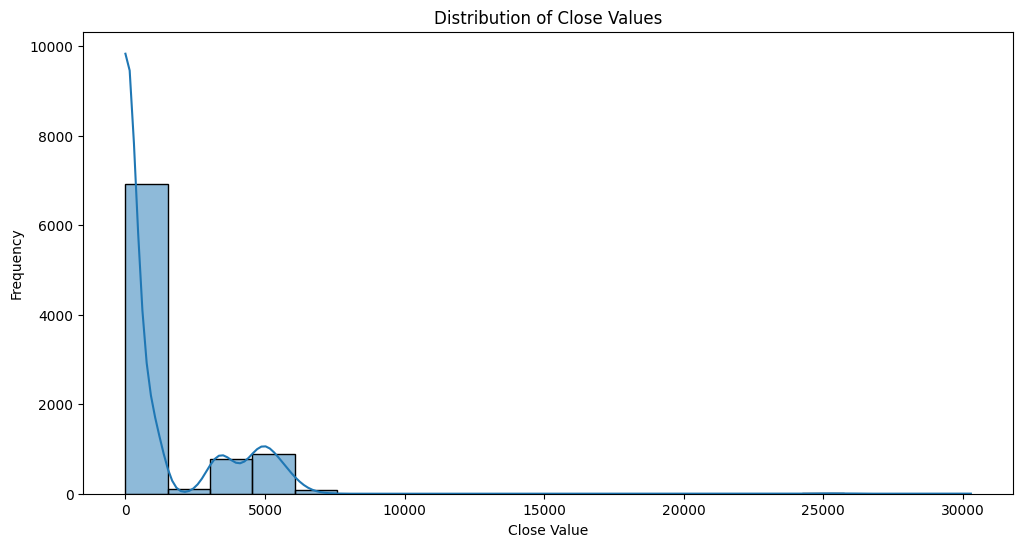

In [16]:
plt.figure(figsize=(10, 6))
sp['deal_stage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deal Stages')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='close_value', data=sp, bins=20, kde=True)
plt.title('Distribution of Close Values')
plt.xlabel('Close Value')
plt.ylabel('Frequency')
plt.show()

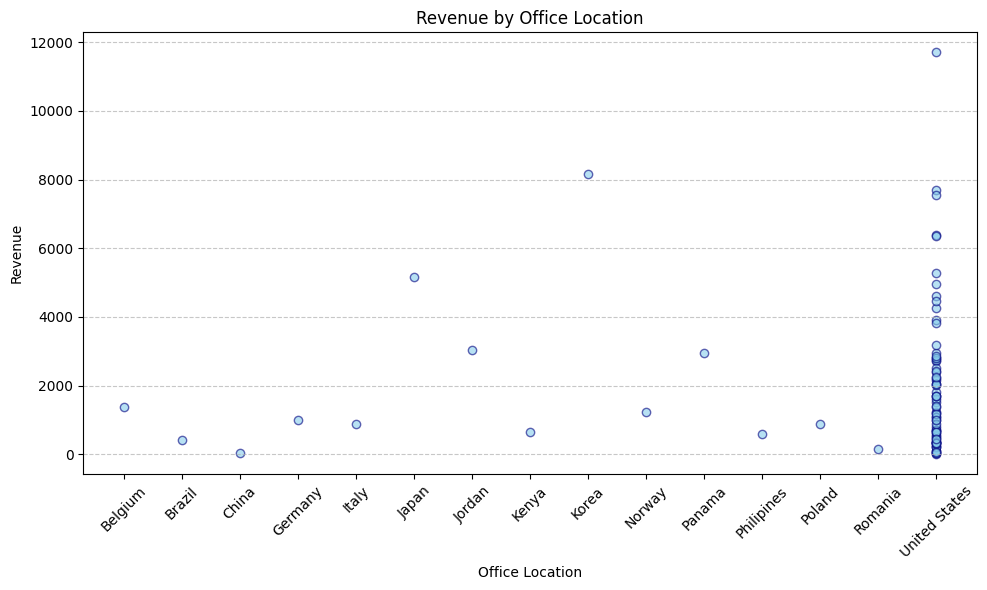

In [22]:
df_plot = acc.copy()

# 2. Drop rows with missing values
df_plot = df_plot.dropna(subset=['revenue', 'office_location'])

# 3. Encode office_location as categorical codes
# We use a categorical type to ensure labels match the codes correctly
df_plot['office_location'] = df_plot['office_location'].astype('category')
df_plot['office_code'] = df_plot['office_location'].cat.codes

# 4. Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['office_code'], df_plot['revenue'], alpha=0.6, color='skyblue', edgecolors='navy')

# Set the ticks to match the categorical codes and labels
plt.xticks(
    ticks=range(len(df_plot['office_location'].cat.categories)), 
    labels=df_plot['office_location'].cat.categories, 
    rotation=45
)

plt.xlabel('Office Location')
plt.ylabel('Revenue')
plt.title('Revenue by Office Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

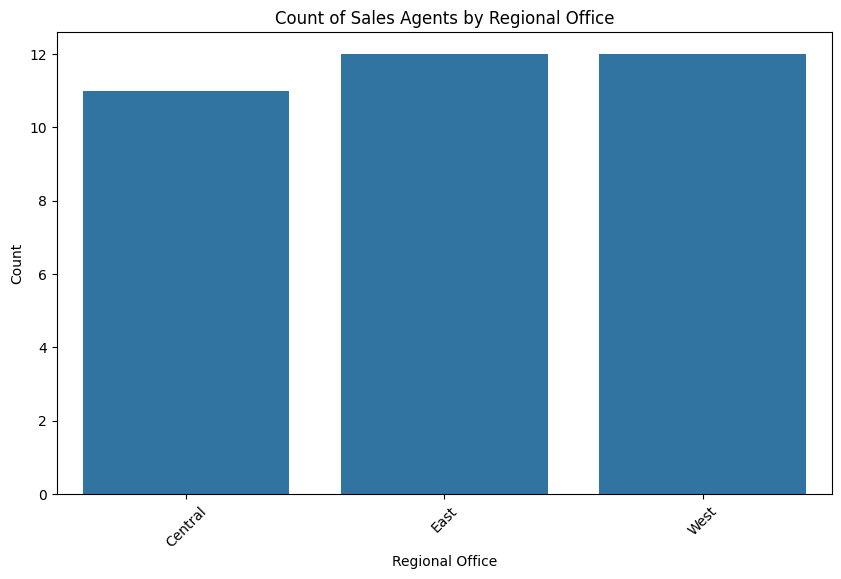

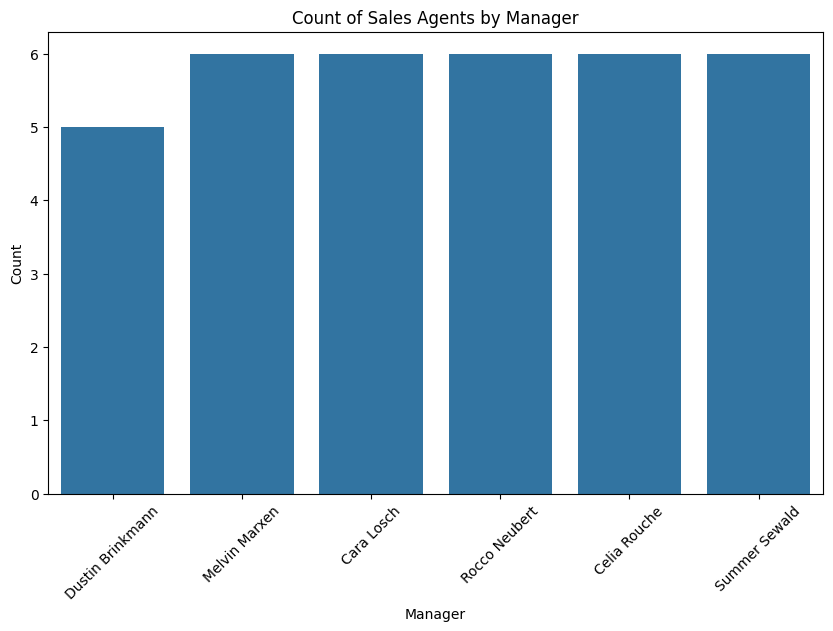

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='regional_office', data=st)
plt.title('Count of Sales Agents by Regional Office')
plt.xlabel('Regional Office')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='manager', data=st)
plt.title('Count of Sales Agents by Manager')
plt.xlabel('Manager')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()